In [1]:
# Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data

In [4]:
crime = pd.read_csv("D:\Data science\Assignments docs\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.shape

(50, 5)

In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Changing the first column name for convinience

In [8]:
crime = crime.rename(columns={'Unnamed: 0': "States"})

In [9]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
# summarize the number of unique values in each column

In [11]:
print(crime.nunique())

States      50
Murder      43
Assault     45
UrbanPop    36
Rape        48
dtype: int64


In [12]:
# Normalizing or standardizing the data

In [13]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchial Clustering

In [15]:
# Importing necessary libraries

In [16]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [17]:
type(df_norm)

pandas.core.frame.DataFrame

In [18]:
# Building hierarchial clustering dendrogram using different linkges 

In [19]:
# Using complete linkage and euclidean method

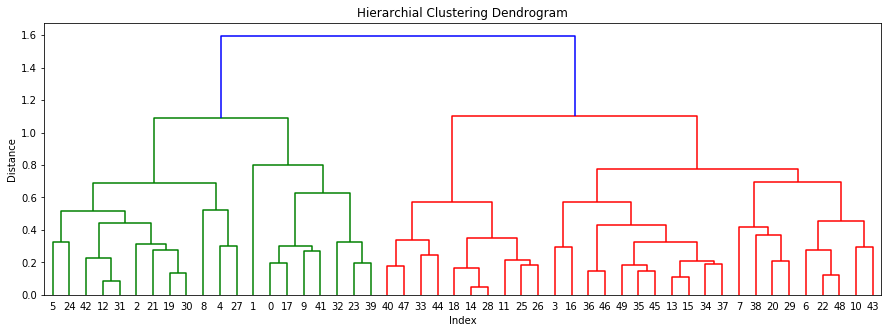

In [20]:
z = linkage(df_norm, method = "complete", metric ="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [21]:
# The dendrogram is clear and distinctive, it shows 4 clusters at distance 1.0

In [22]:
# Using single linkage and euclidean method

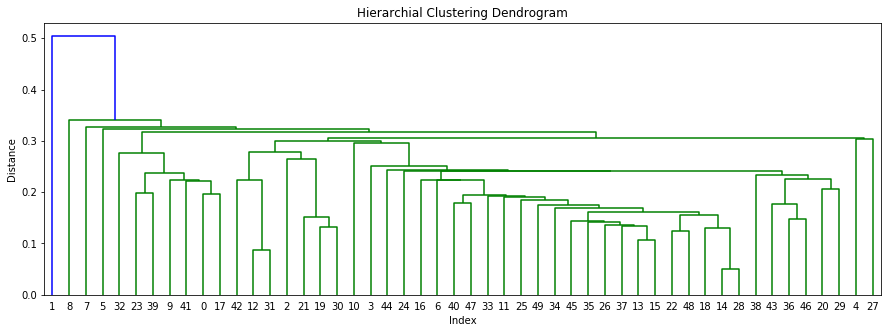

In [23]:
z = linkage(df_norm, method = "single", metric ="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [24]:
# The dendrogram is clumsy and difficult to find distinctive clusters

In [25]:
# Using average linkage and euclidean method

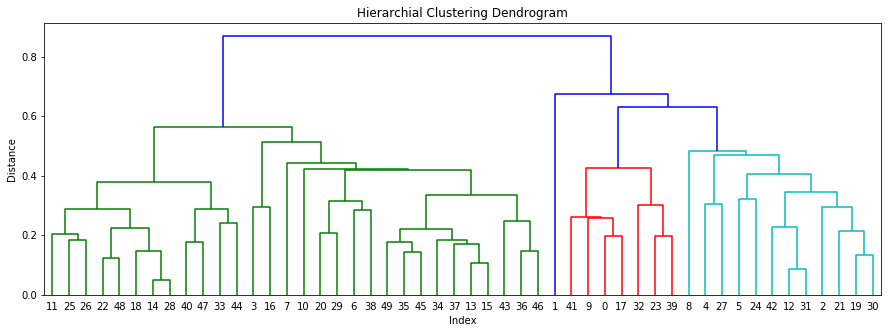

In [26]:
z = linkage(df_norm, method = "average", metric ="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [27]:
# The dendrogram is clumsy at lower distances and difficult to find distinctive clusters

In [28]:
# Using centroid linkage and euclidean method

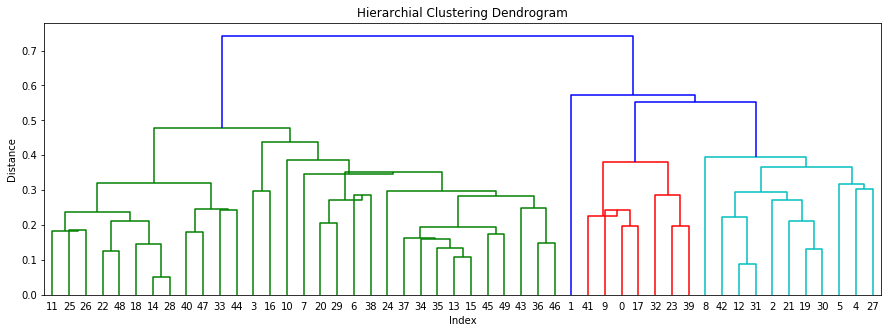

In [29]:
z = linkage(df_norm, method = "centroid", metric ="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [30]:
# The dendrogram is clumsy at lower distances and difficult to find distinctive clusters

In [31]:
# Using ward linkage and euclidean method

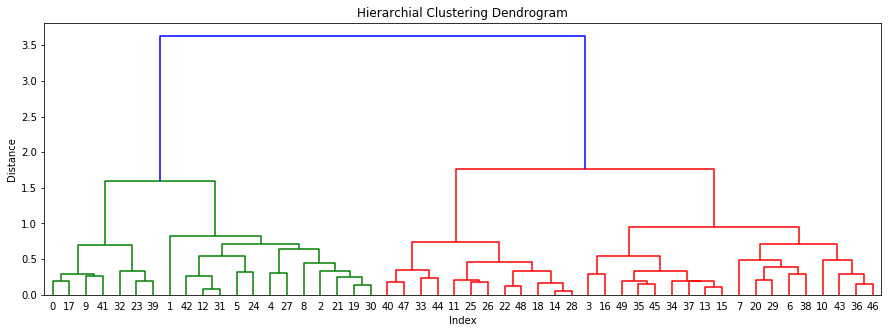

In [32]:
z = linkage(df_norm, method = "ward", metric ="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
    )
plt.show()

In [33]:
# The dendrogram is clumsy at lower distances but at higher distances 4 distinctive clusters are formed at distance 1.0

In [34]:
# Considering the "complete" linkage cluster dendrogram, the distinctive clusters formed are 4.

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage="complete", affinity="euclidean").fit(df_norm)

In [37]:
cluster_labels =pd.Series(h_complete.labels_) 
cluster_labels.head()

0    0
1    0
2    3
3    1
4    3
dtype: int64

In [38]:
# creating a  new column and assigning the cluster labels

In [39]:
crime["clust"]=cluster_labels

In [40]:
# Scatter plot of "Murder" and "Assault" for both clusters

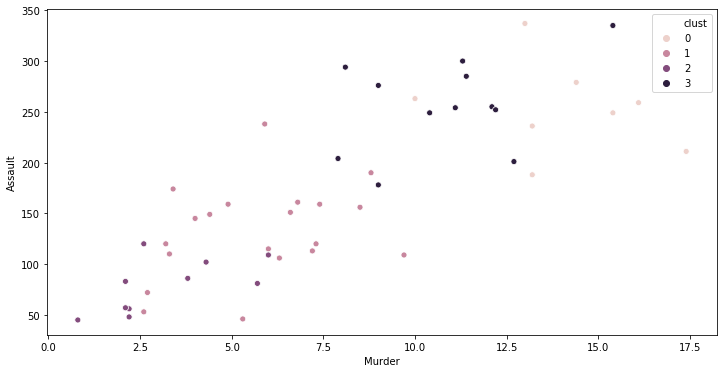

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=crime.clust)

In [42]:
# The scatter plot shows that, the higher crime rate points are grouped into 3rd cluster and others are grouped into remaining clusters

In [43]:
crime.clust.value_counts()

1    20
3    12
2    10
0     8
Name: clust, dtype: int64

In [44]:
# Cluster 1 has highest no. of observations and cluster 0 has lowest no. of observations

In [45]:
# Cluster 0 States

In [46]:
crime[crime['clust']==0]

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [47]:
# Cluster 1 states

In [48]:
crime[crime['clust']==1]

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


In [49]:
# Cluster 2 states

In [50]:
crime[crime['clust']==2]

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2
47,West Virginia,5.7,81,39,9.3,2


In [51]:
# Cluster 3 states

In [52]:
crime[crime['clust']==3]

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


In [53]:
# Aggregate mean of each cluster

In [54]:
crime.groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [56]:
# Observations
# The 2nd cluster is the cluster with lowest crime rate and also lowest population
# The 0th cluster is the cluster with highest crime rate and also highest population
# The 1st and 3rd cluster lies in between 2 and 0

# K means clustering

In [57]:
# Importing necessary libraries

In [58]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [59]:
# screw plot or elbow curve

In [60]:
k = list(range(2,15))            # Specifying the range of k for which the plot is to be created

In [61]:
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    WSS=[]                   # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1, df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x251cadc01c8>,
 <a list of 13 Text xticklabel objects>)

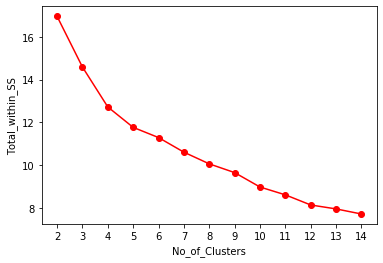

In [62]:
plt.plot(k, TWSS, "ro-");plt.xlabel("No_of_Clusters");plt.ylabel("Total_within_SS");plt.xticks(k)

In [63]:
# from above scree plot it is observed that the elbow of the curve is at 4 clusters, after which the TWSS variation is low

In [64]:
model=KMeans(n_clusters=4)            # Building model for 4 clusters

In [65]:
model.fit(df_norm)

KMeans(n_clusters=4)

In [66]:
model.labels_               # getting the labels of clusters assigned to each row 

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [67]:
md = pd.Series(model.labels_)       # converting numpy array into pandas series object
crime["kclust"]= md                 # creating a  new column and assigning labels to it 

In [68]:
crime.head()

,States,Murder,Assault,UrbanPop,Rape,clust,kclust
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,1


In [69]:
# Scatter plot of "Murder" and "Assault" for all clusters

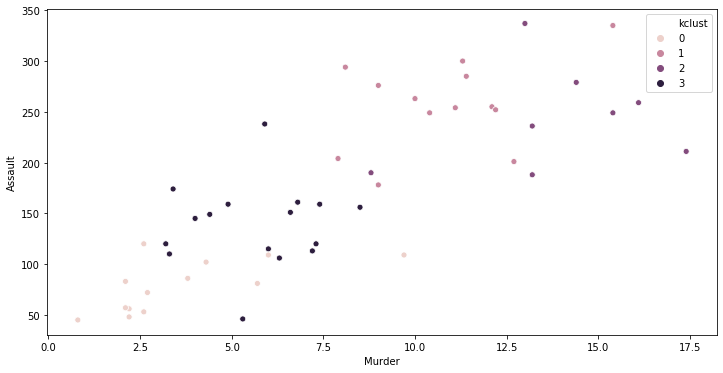

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=crime.kclust)

In [ ]:
# The scatter plot shows that, the higher crime rate points are grouped into 2nd cluster and others are grouped into remaining clusters

In [71]:
crime.kclust.value_counts()         # Value counts of different clusters

3    16
1    13
0    13
2     8
Name: kclust, dtype: int64

In [72]:
# cluster 0 states

In [73]:
crime[crime['kclust']==0] 

,States,Murder,Assault,UrbanPop,Rape,clust,kclust
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,1,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,1,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [74]:
# Cluster 1 states

In [75]:
crime[crime['kclust']==1] 

,States,Murder,Assault,UrbanPop,Rape,clust,kclust
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,3,1
4,California,9.0,276,91,40.6,3,1
5,Colorado,7.9,204,78,38.7,3,1
8,Florida,15.4,335,80,31.9,3,1
12,Illinois,10.4,249,83,24.0,3,1
19,Maryland,11.3,300,67,27.8,3,1
21,Michigan,12.1,255,74,35.1,3,1
24,Missouri,9.0,178,70,28.2,3,1
27,Nevada,12.2,252,81,46.0,3,1


In [76]:
# Cluster 2 States

In [77]:
crime[crime['kclust']==2] 

,States,Murder,Assault,UrbanPop,Rape,clust,kclust
0,Alabama,13.2,236,58,21.2,0,2
3,Arkansas,8.8,190,50,19.5,1,2
9,Georgia,17.4,211,60,25.8,0,2
17,Louisiana,15.4,249,66,22.2,0,2
23,Mississippi,16.1,259,44,17.1,0,2
32,North Carolina,13.0,337,45,16.1,0,2
39,South Carolina,14.4,279,48,22.5,0,2
41,Tennessee,13.2,188,59,26.9,0,2


In [78]:
# Cluster 3 states

In [79]:
crime[crime['kclust']==3] 

,States,Murder,Assault,UrbanPop,Rape,clust,kclust
6,Connecticut,3.3,110,77,11.1,1,3
7,Delaware,5.9,238,72,15.8,1,3
10,Hawaii,5.3,46,83,20.2,1,3
13,Indiana,7.2,113,65,21.0,1,3
15,Kansas,6.0,115,66,18.0,1,3
20,Massachusetts,4.4,149,85,16.3,1,3
29,New Jersey,7.4,159,89,18.8,1,3
34,Ohio,7.3,120,75,21.4,1,3
35,Oklahoma,6.6,151,68,20.0,1,3
36,Oregon,4.9,159,67,29.3,1,3


In [80]:
# Checking aggregate mean of each cluster

In [81]:
crime.iloc[:,1:5].groupby(crime.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


In [82]:
# Observations
# Cluster 0 has the lowest crime rate with lowest population
# Cluster 1 and 3 follows the cluster 0
# Cluster 2 has the highest rate of crime with highest population